## **Model Building**

### Split Data into x and y

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('preprocessed_data.csv')

In [3]:
x = data.drop('PerformanceRating', axis=1)  # Features
y = data['PerformanceRating']  # Target

In [4]:
x.head()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,...,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Num,Education,MaritalStatus_num,Department,BusinessTravel,Overtime,Attrition_num
0,32,10,3,4,55,3,2,4,1,12,...,7,0,8,1,3,1,0,0,0,0
1,47,14,4,4,42,3,2,1,2,12,...,7,1,7,1,3,1,0,0,0,0
2,40,5,4,4,48,2,3,1,5,21,...,13,1,12,1,1,2,0,1,1,0
3,41,10,4,2,73,2,5,4,3,15,...,6,12,6,1,6,0,2,0,0,0
4,60,16,4,1,84,3,2,1,8,14,...,2,2,2,1,3,1,0,0,0,0


In [5]:
y.head()

0    3
1    3
2    4
3    3
4    3
Name: PerformanceRating, dtype: int64

In [6]:
## training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

## **Model Comparison**

In [7]:
!!pip install catboost

['Requirement already satisfied: catboost in c:\\users\\disha\\anaconda3\\lib\\site-packages (1.2)',
 'Requirement already satisfied: graphviz in c:\\users\\disha\\anaconda3\\lib\\site-packages (from catboost) (0.20.1)',
 'Requirement already satisfied: matplotlib in c:\\users\\disha\\anaconda3\\lib\\site-packages (from catboost) (3.7.2)',
 'Requirement already satisfied: numpy>=1.16.0 in c:\\users\\disha\\anaconda3\\lib\\site-packages (from catboost) (1.24.3)',
 'Requirement already satisfied: pandas>=0.24 in c:\\users\\disha\\anaconda3\\lib\\site-packages (from catboost) (2.0.3)',
 'Requirement already satisfied: scipy in c:\\users\\disha\\anaconda3\\lib\\site-packages (from catboost) (1.11.1)',
 'Requirement already satisfied: plotly in c:\\users\\disha\\anaconda3\\lib\\site-packages (from catboost) (5.9.0)',
 'Requirement already satisfied: six in c:\\users\\disha\\anaconda3\\lib\\site-packages (from catboost) (1.16.0)',
 'Requirement already satisfied: python-dateutil>=2.8.2 in c:

In [8]:
# Modelling
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# Create an Evaluate Function to give all metrics after model Training
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted, average='weighted')  # or 'micro', 'macro', etc.
    recall = recall_score(true, predicted, average='weighted')  # or 'micro', 'macro', etc.
    f1 = f1_score(true, predicted, average='weighted')  # or 'micro', 'macro', etc.
    return accuracy, precision, recall, f1


# Define your classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Support Vector Classifier": SVC()
}


# Sample dataset split into features (X) and labels (y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Iterate through the models and train/evaluate them
for model_name, model in models.items():
    model.fit(x_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluate Train and Test dataset
    accuracy_train, precision_train, recall_train, f1_train = evaluate_model(y_train, y_train_pred)
    accuracy_test, precision_test, recall_test, f1_test = evaluate_model(y_test, y_test_pred)




    print(model_name)
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(accuracy_train))
    print("- Precision: {:.4f}".format(precision_train))
    print("- Recall: {:.4f}".format(recall_train))
    print("- F1 Score: {:.4f}".format(f1_train))
    print('----------------------------------')
    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(accuracy_test))
    print("- Precision: {:.4f}".format(precision_test))
    print("- Recall: {:.4f}".format(recall_test))
    print("- F1 Score: {:.4f}".format(f1_test))
    print('=' * 35)
    print('\n')

c:\Users\disha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Model performance for Training set
- Accuracy: 0.7667
- Precision: 0.7514
- Recall: 0.7667
- F1 Score: 0.7543
----------------------------------
Model performance for Test set
- Accuracy: 0.7708
- Precision: 0.7741
- Recall: 0.7708
- F1 Score: 0.7584


Decision Tree Classifier
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8667
- Precision: 0.8767
- Recall: 0.8667
- F1 Score: 0.8703


Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9333
- Precision: 0.9380
- Recall: 0.9333
- F1 Score: 0.9328


CatBoosting Classifier
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
----------------------------------
Mod

c:\Users\disha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\disha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Based on the test set performance metrics, both the Random Forest Classifier and the CatBoosting Classifier seem to perform very well. They have high accuracy and F1 scores, indicating good balance between precision and recall. The Decision Tree Classifier also performs well but not as strongly as the other two.


## **Random Forest Classifier**

In [16]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed

# Fit the model on the training data
rf_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(x_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the performance metrics
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))


Accuracy: 0.9333
Precision: 0.9366
Recall: 0.9333
F1 Score: 0.9324


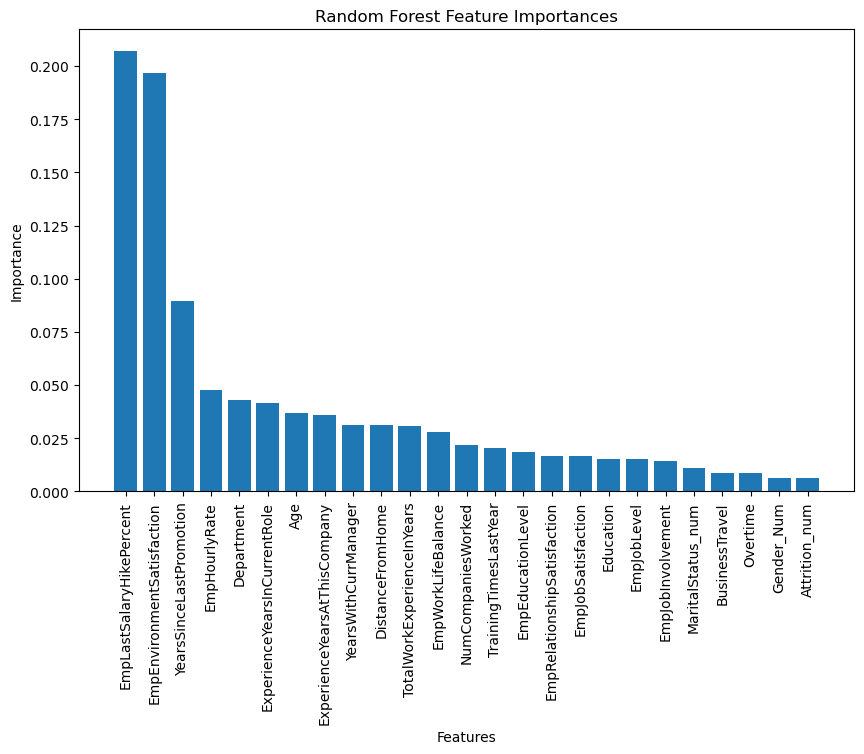

In [17]:
import matplotlib.pyplot as plt

feature_importances = rf_classifier.feature_importances_
feature_names = x.columns  

# Sort features by importance
sorted_indices = feature_importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices])
plt.xticks(range(len(feature_importances)), [feature_names[i] for i in sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()
